
Mean Squared Error for 0: 0.00


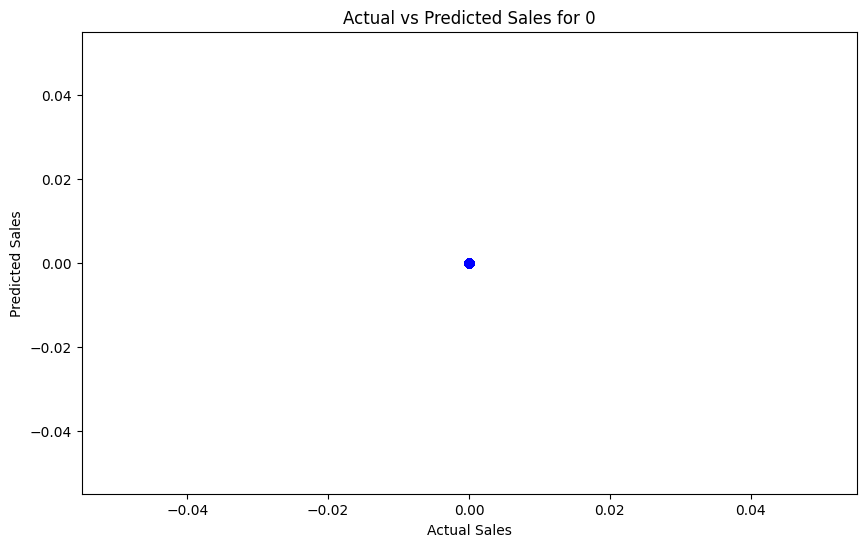

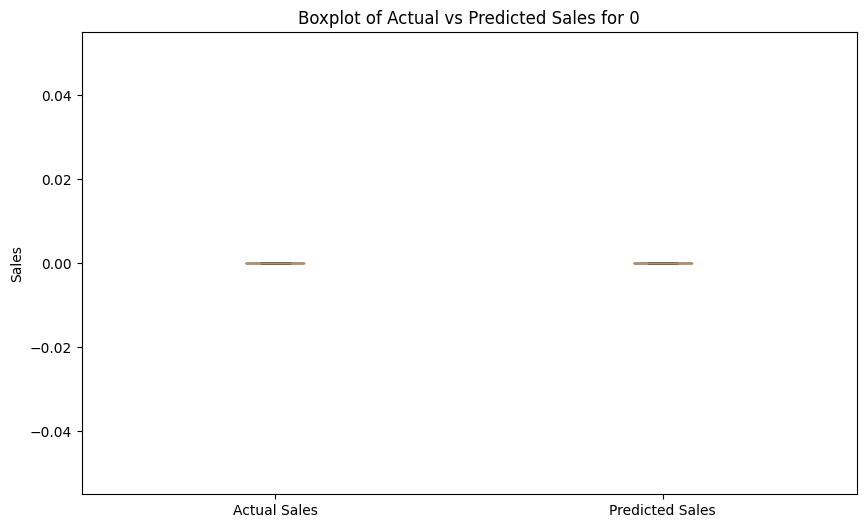


Mean Squared Error for  4 PURPLE FLOCK DINNER CANDLES: 2.10


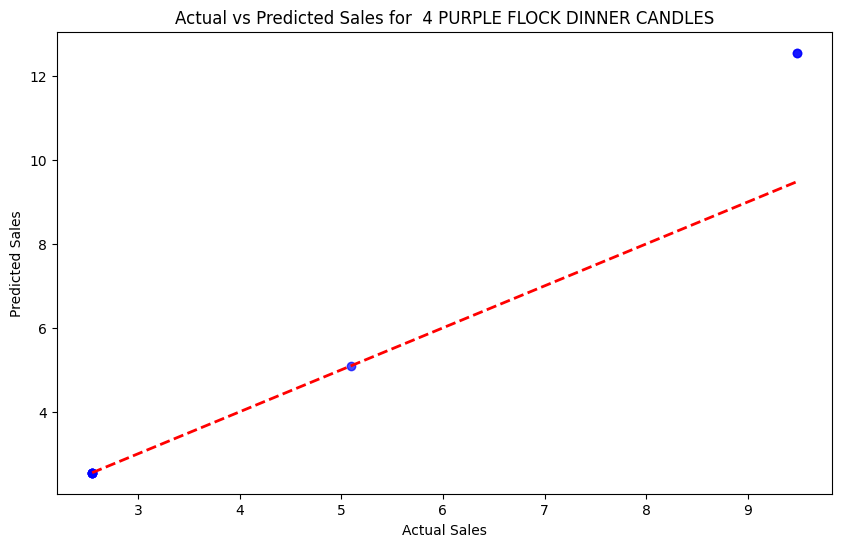

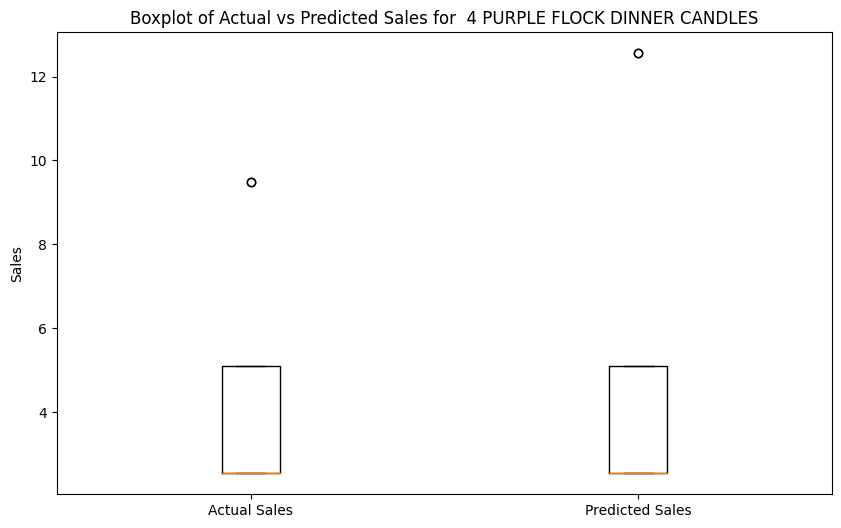


Mean Squared Error for  50'S CHRISTMAS GIFT BAG LARGE: 5035.38


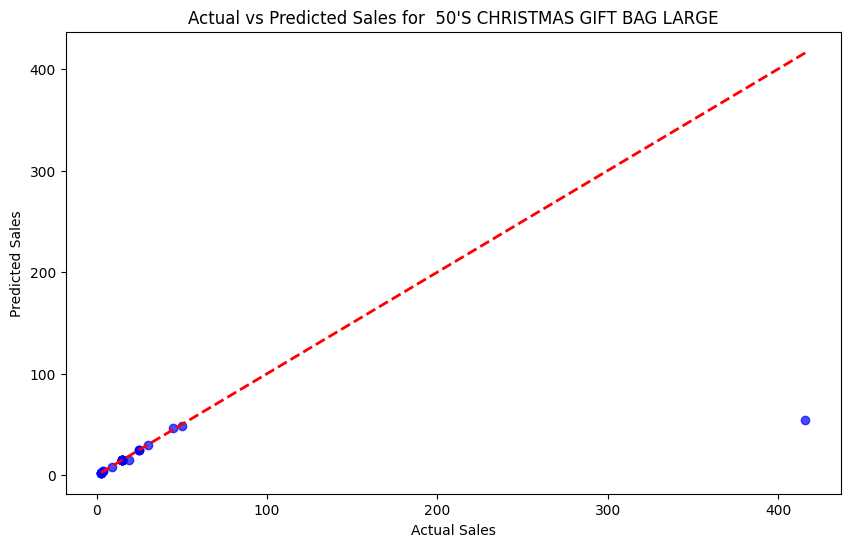

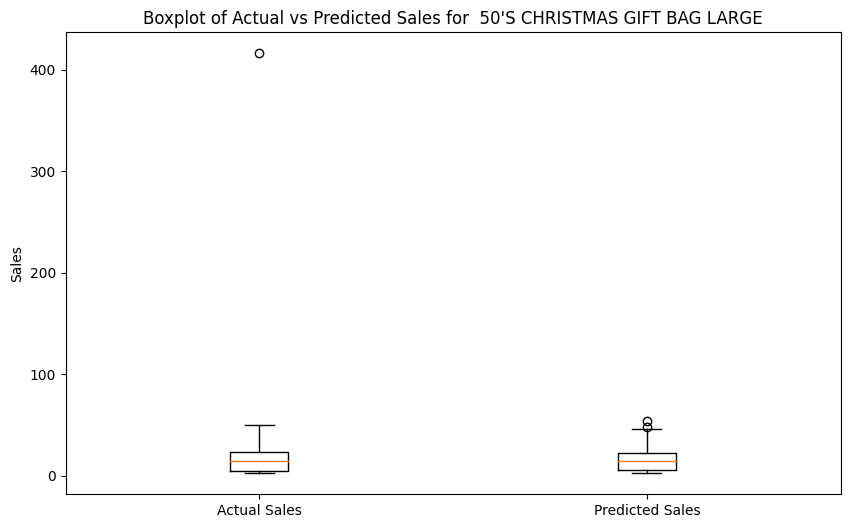


Mean Squared Error for  DOLLY GIRL BEAKER: 1.18


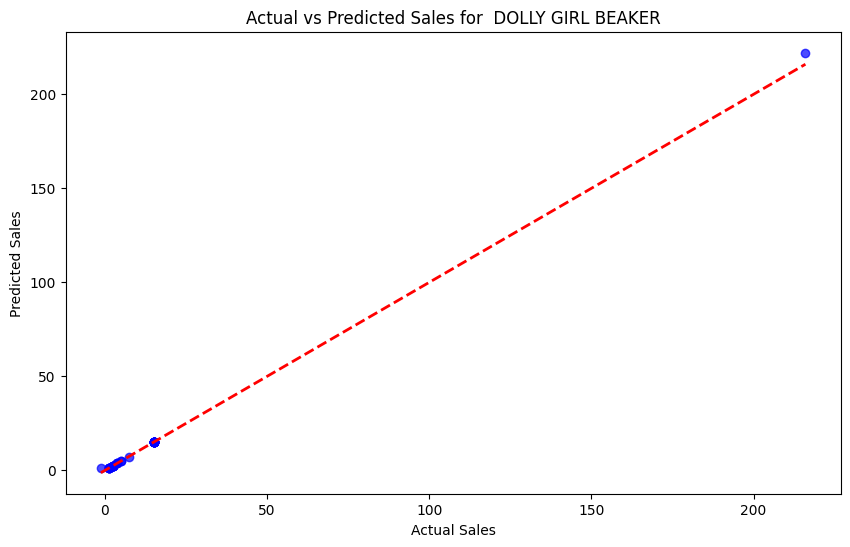

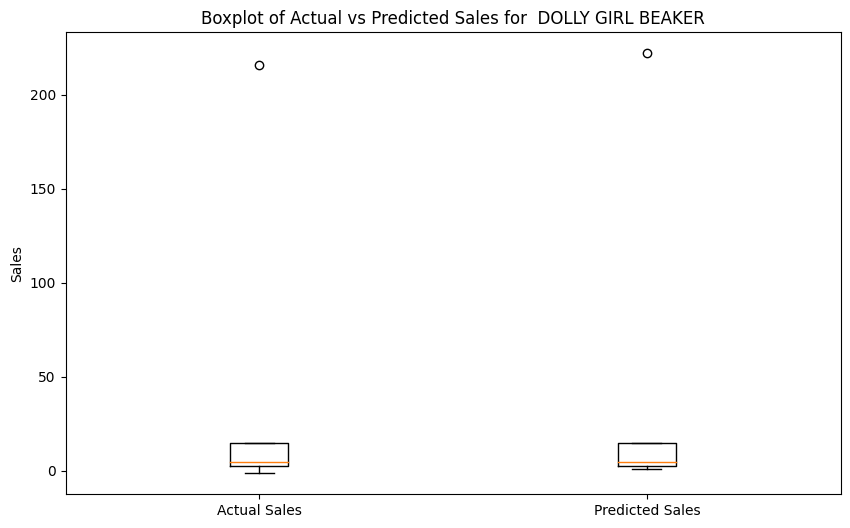


Mean Squared Error for  I LOVE LONDON MINI BACKPACK: 265.75


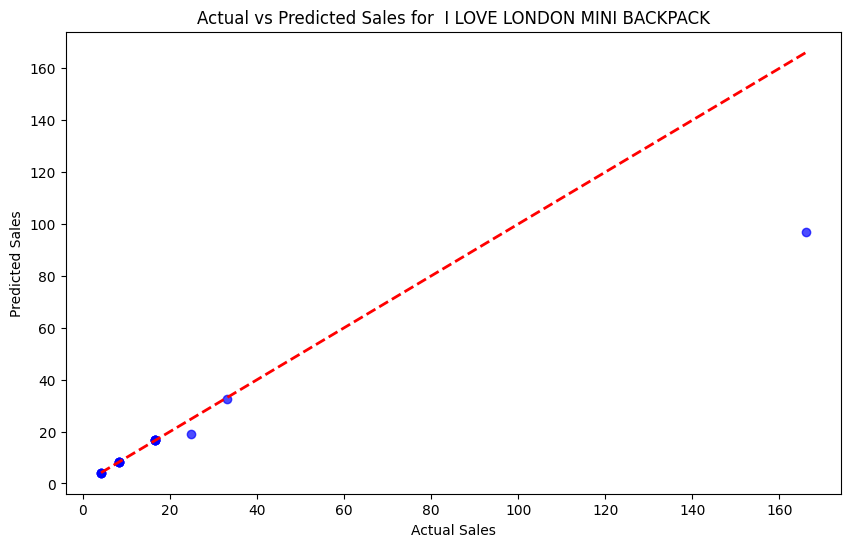

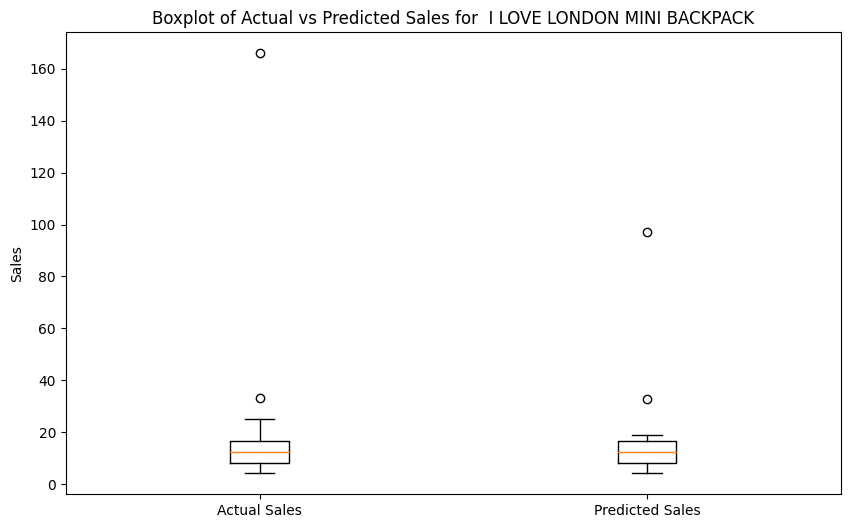

Skipping category ' I LOVE LONDON MINI RUCKSACK' due to insufficient samples.

Mean Squared Error for  NINE DRAWER OFFICE TIDY: 0.00


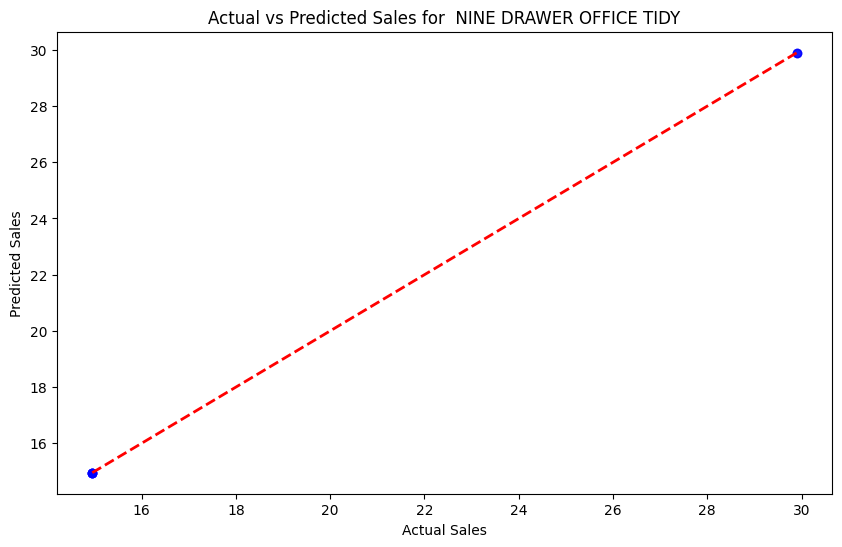

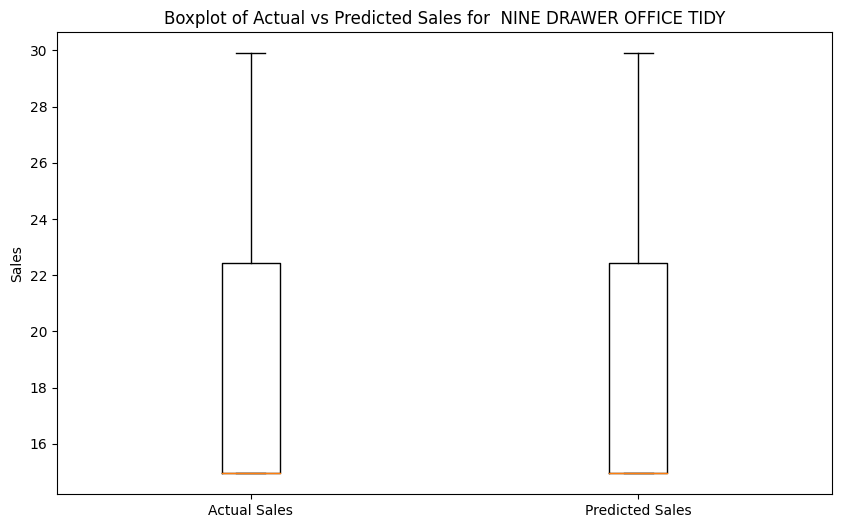


Mean Squared Error for  OVAL WALL MIRROR DIAMANTE : 12.81


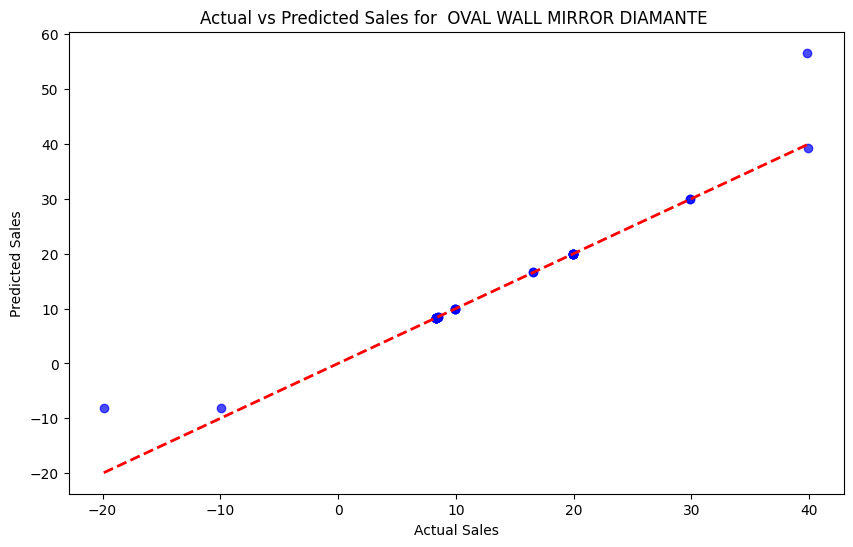

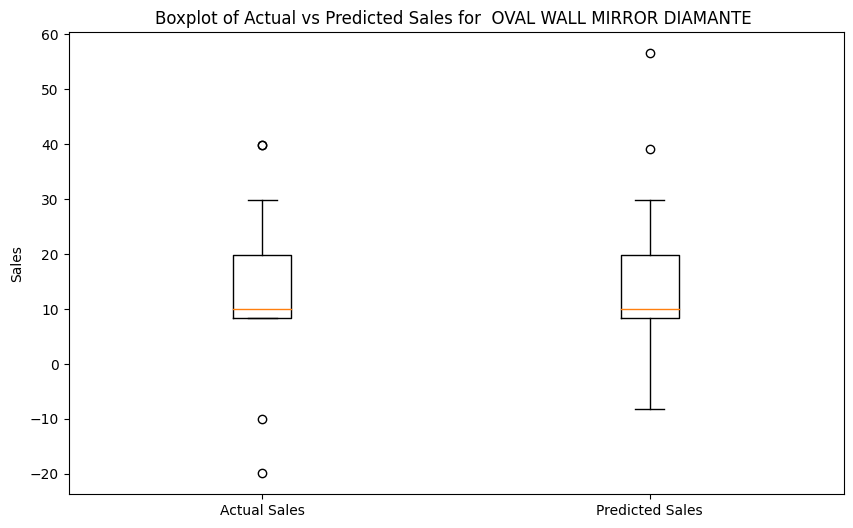


Mean Squared Error for  RED SPOT GIFT BAG LARGE: 0.00
Maximum number of plots reached (7). Stopping further graph generation.

Results Summary:
                         Category           MSE  \
0                               0  0.000000e+00   
1   4 PURPLE FLOCK DINNER CANDLES  2.098791e+00   
2   50'S CHRISTMAS GIFT BAG LARGE  5.035383e+03   
3               DOLLY GIRL BEAKER  1.182028e+00   
4     I LOVE LONDON MINI BACKPACK  2.657527e+02   
5         NINE DRAWER OFFICE TIDY  1.500188e-27   
6      OVAL WALL MIRROR DIAMANTE   1.281139e+01   
7         RED SPOT GIFT BAG LARGE  3.337536e-03   

                                              y_test  \
0  [0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, ...   
1  [2.55, 5.1, 2.55, 2.55, 2.55, 9.48, 2.55, 9.48...   
2  [15.0, 15.0, 15.0, 3.75, 2.46, 15.0, 8.75, 2.4...   
3  [15.0, 5.0, 15.0, 2.5, 1.25, 3.75, 15.0, 15.0,...   
4  [8.29, 4.15, 33.2, 8.3, 16.6, 16.6, 16.6, 16.6...   
5    [14.95, 29.9, 29.9, 14.95, 14.95, 14.95, 14.95]   
6  

In [1]:
# Step 1: Install and Import Necessary Libraries
!pip install ucimlrepo pandas numpy scikit-learn matplotlib seaborn

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Fetch the Online Retail dataset
online_retail = fetch_ucirepo(id=352)

# Step 3: Access the features and create a DataFrame
X = online_retail.data.features
df = pd.DataFrame(X)

# Step 4: Calculate `TotalSales` as `Quantity * UnitPrice` and use it as the target variable
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Step 5: Check for NaN values and handle if necessary
df.fillna(0, inplace=True)

# Step 6: Prepare the dataset and group by product category
grouped = df.groupby('Description')  # Assuming 'Description' is a product category

results = []  # To store results for each category

# Create a directory to store plots
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

# Set a minimum number of samples required to generate plots
min_samples = 10
max_plots = 7  # Limit the number of categories to plot

plot_count = 0  # Counter for the number of plots generated

for name, group in grouped:
    if len(group) < min_samples:  # Check if there are enough samples to train
        print(f"Skipping category '{name}' due to insufficient samples.")
        continue

    # Prepare data for the model
    X = group[['Quantity', 'UnitPrice']]
    y = group['TotalSales']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nMean Squared Error for {name}: {mse:.2f}")

    # Store results
    results.append({
        'Category': name,
        'MSE': mse,
        'y_test': y_test.values,
        'y_pred': y_pred
    })

    # Check if the maximum number of plots has been reached
    if plot_count >= max_plots:
        print(f"Maximum number of plots reached ({max_plots}). Stopping further graph generation.")
        break

    # Visualization of Actual vs Predicted Sales using Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Actual vs Predicted Sales for {name}")
    plt.savefig(f'plots/scatter_{name}.png')  # Save the plot
    plt.show()

    # Boxplot for Actual and Predicted Sales
    plt.figure(figsize=(10, 6))
    plt.boxplot([y_test, y_pred], labels=['Actual Sales', 'Predicted Sales'])
    plt.title(f'Boxplot of Actual vs Predicted Sales for {name}')
    plt.ylabel('Sales')
    plt.savefig(f'plots/boxplot_{name}.png')  # Save the plot
    plt.show()

    # Increment the plot counter
    plot_count += 1

# Convert results into a DataFrame for further analysis if needed
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv('results_summary.csv', index=False)

print("\nResults Summary:")
print(results_df)

